In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import pickle
import re
%matplotlib inline

In [52]:

with open(r"movie_DF_0427.p", "rb") as input_file:
    mov = pickle.load(input_file)

In [53]:
mov.head()

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,rev_totalGross,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ
1,890,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,18365865.06860,...,1985,1985,3.5,20560.131429,4.502261e+07,1985,107.6,5650869.561865,1.558343,1
3,240,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,56370318.57600,...,1979,1979,2.5,60753.264000,1.934629e+08,1979,72.6,24281886.199245,1.541993,1
6,3773,Jeffrey Blitz,ThinkFilm,Documentary,G,Spellbound,2003-04-30,0,spellbound,8191870.83000,...,2003,2003,6.0,25036.440000,1.171438e+07,2003,184.0,1470292.595044,1.494456,1
7,4000,"Zana Briski, Ross Kauffman",ThinkFilm,Documentary,R,Born into Brothels,2004-12-08,0,bornintobrothels,4864390.86774,...,2004,2004,6.2,20211.435484,6.731689e+06,2004,188.9,844906.581073,1.486565,1
13,428,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,9100017.91111,...,1981,1981,2.7,57915.000000,2.891783e+07,1981,90.9,3629530.152339,1.479403,1


In [54]:
mov.columns

Index([              u'Unnamed: 0',                 u'director',
                    u'distributor',             u'genre_bomojo',
                         u'rating',                    u'title',
                    u'releaseDate',                   u'isCult',
                     u'canontitle',           u'rev_totalGross',
                    u'rev_opening',             u'num_theaters',
                        u'runtime',              u'prod_budget',
                u'rev_postOpening',                u'leadActor',
                   u'runtime_mins',              u'releaseYear',
                           u'Year',                 u'AvgPrice',
                u'rev_opening_ADJ',       u'rev_totalGross_ADJ',
                           u'year',                      u'CPI',
                u'prod_budget_ADJ',               u'CULT_INDEX',
       u'is_missing_prodbudgetADJ'],
      dtype='object')

In [55]:
mov.drop(['Unnamed: 0','rev_opening','rev_postOpening','runtime','Year','year','rev_totalGross','prod_budget','AvgPrice','CPI'], axis=1, inplace=True)

In [56]:
mov.shape

(5229, 17)

In [57]:
mov.columns

Index([u'director', u'distributor', u'genre_bomojo', u'rating', u'title',
       u'releaseDate', u'isCult', u'canontitle', u'num_theaters', u'leadActor',
       u'runtime_mins', u'releaseYear', u'rev_opening_ADJ',
       u'rev_totalGross_ADJ', u'prod_budget_ADJ', u'CULT_INDEX',
       u'is_missing_prodbudgetADJ'],
      dtype='object')

In [60]:
#normalize genres
mov.genre_bomojo.value_counts()

Unknown               697
Comedy                678
Drama                 365
Romantic Comedy       277
Thriller              199
Horror                195
Comedy / Drama        191
Action                159
Animation             158
Family Comedy         127
Romance               119
Action Comedy         115
Crime Drama           105
Drama / Thriller      103
Family Adventure       89
Period Drama           88
Action Thriller        83
Crime Comedy           80
Music Drama            80
Sports Drama           74
Fantasy Comedy         56
Sports Comedy          53
Sci-Fi Action          52
Horror Comedy          48
Sci-Fi Horror          47
Crime Thriller         47
Horror Thriller        43
Action Drama           43
Action / Adventure     41
Musical                41
                     ... 
War                    36
Romantic Thriller      35
Fantasy                32
Sci-Fi Comedy          31
Period Comedy          29
Action Horror          28
Sci-Fi Thriller        28
Fantasy Dram

In [59]:
#mov=mov.loc[mov.genre_bomojo != "Documentary",:]

In [81]:

mov.genre_bomojo.astype('category')
genreGroups = ["Group %s" % g for g in mov.genre_bomojo.cat.categories]
len(genreGroups)

64

In [82]:
mov['genre']=mov.genre_bomojo.str.extract(r'^(Adventure|Action|Comedy|Romance|Romantic|Fantasy|Drama|Crime|Horror|Music|Musical|Unknown|Foreign|Sci-Fi|Animation|Concert|Family|Historical|IMAX|Period|Sports|Thriller|War|Western)')

In [85]:
mov.genre.value_counts()

Comedy        895
Unknown       697
Action        516
Drama         468
Romantic      315
Horror        286
Crime         258
Family        243
Sci-Fi        215
Thriller      199
Period        178
Animation     158
Sports        134
Music         121
Romance       119
Fantasy       115
War            63
Western        44
Adventure      36
Historical     28
Foreign        18
Concert         7
IMAX            5
Name: genre, dtype: int64

In [100]:
mov=mov[mov.genre!="IMAX"]

In [101]:
mov=mov[mov.genre!='Concert']

In [102]:
mov=mov[mov.genre!='Historical']


In [209]:
mov['genre']=mov.genre.str.replace(r'^Romance|Romantic','Romance')

In [210]:
mov.genre.value_counts()

Comedy       895
Unknown      697
Action       516
Drama        468
Romance      434
Horror       286
Crime        258
Family       243
Sci-Fi       215
Thriller     199
Period       178
Animation    158
Sports       134
Music        121
Fantasy      115
War           63
Western       44
Adventure     36
Foreign       18
Name: genre, dtype: int64

In [211]:
cult = mov[mov.isCult==1]
nocultSample = mov[mov.isCult==0].sample(432)

movsample = pd.concat([cult, nocultSample])
#cult.isCult.sum()
movsample.shape

(864, 19)

In [197]:
#nocultSample.isCult.sum()

0.0

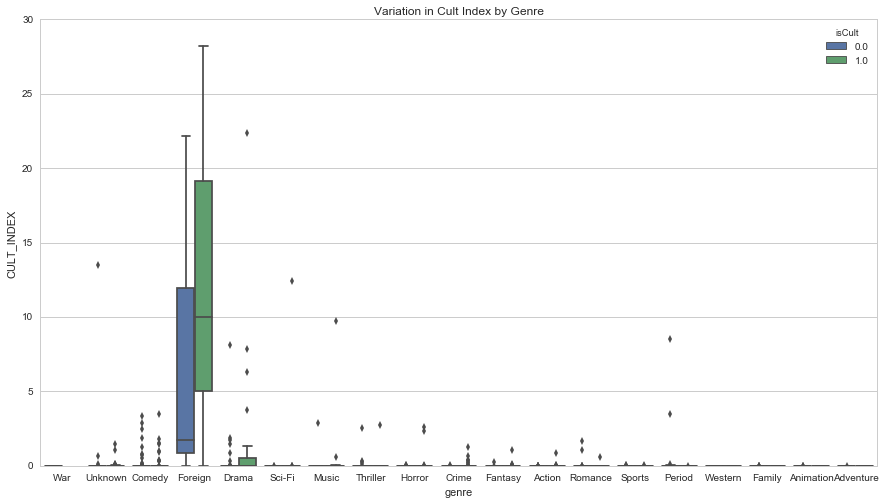

In [222]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')


#sns.boxplot(x='genre',y='CULT_INDEX',data=mov.loc[~mov.genre.isin(['Foreign','Drama']),:])
sns.boxplot(x='genre',y='CULT_INDEX',data=movsample, hue='isCult')
plt.ylim(0,30)
plt.title('Variation in Cult Index by Genre')

In [122]:
pickle.dump(mov, open('movie_DF_0427.p', 'wb'))

In [139]:
mov.rating.value_counts()

R          2461
PG-13      1422
PG          994
G           145
Unrated      40
NC-17        10
GP            5
M             1
Name: rating, dtype: int64

In [132]:
mov.columns

Index([                u'director',              u'distributor',
                   u'genre_bomojo',                   u'rating',
                          u'title',              u'releaseDate',
                         u'isCult',               u'canontitle',
                   u'num_theaters',                u'leadActor',
                   u'runtime_mins',              u'releaseYear',
                u'rev_opening_ADJ',       u'rev_totalGross_ADJ',
                u'prod_budget_ADJ',               u'CULT_INDEX',
       u'is_missing_prodbudgetADJ',                    u'genre'],
      dtype='object')

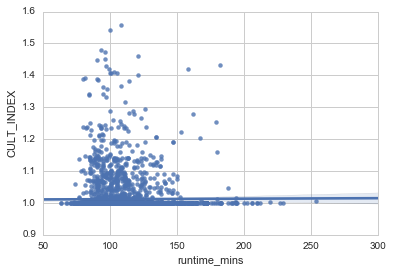

In [144]:
sns.regplot(x='runtime_mins',y='CULT_INDEX',data=mov)

In [145]:
mov.to_csv('./movie_df_apr27.csv',header=True,encoding='utf-8')

In [155]:
mov.sort_values(by='lifetimeRevenue', ascending=False).head(20)

,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre,lifetimeRevenue
4966,Steven Spielberg,Universal,Horror Thriller,PG,Jaws,1975-06-20,0,jaws,409.000000,Roy Scheider,125,1975,8.664738e+11,4.785066e+09,3.096654e+07,1.000989,0,Horror,4.334070e+08
4967,Joseph Sargent,Universal,Horror Thriller,PG,Jaws: The Revenge,1975-06-20,0,jaws,409.000000,Lorraine Gary,125,1975,8.664738e+11,4.785066e+09,3.096654e+07,1.000989,0,Horror,4.334070e+08
5132,William Friedkin,Warner Bros.,Horror,R,The Exorcist,1973-12-26,0,exorcist,1791.710853,Ellen Burstyn,122,1973,1.655775e+07,4.916251e+09,6.170476e+08,1.000375,1,Horror,4.300233e+08
5429,Renny Harlin,Warner Bros.,Horror,R,Exorcist: The Beginning,1973-12-26,0,exorcist,1791.710853,Stellan Skarsgård,122,1973,1.655775e+07,4.916251e+09,6.170476e+08,1.000375,1,Horror,4.300233e+08
5136,George Roy Hill,Universal,Crime Comedy,PG,The Sting,1973-12-25,0,sting,1698.043732,Paul Newman,129,1973,7.984747e+06,3.973757e+09,4.987535e+08,1.000409,1,Crime,3.475836e+08
3176,James Cameron,Paramount,Romance,PG-13,Titanic,1997-12-19,0,titanic,2674.000000,Leonardo DiCaprio,194,1997,5.460337e+07,2.184092e+09,2.965732e+08,1.000226,0,Romance,3.384698e+08
3175,Robert Lieberman,Paramount,Romance,PG-13,Titanic,1997-12-19,0,titanic,2674.000000,George C. Scott,194,1997,5.460337e+07,2.184092e+09,2.965732e+08,1.000226,0,Romance,3.384698e+08
746,Francis Ford Coppola,Paramount,Crime Drama,R,The Godfather,1972-03-15,0,godfather,1740.000000,Marlon Brando,175,1972,1.526195e+06,3.405686e+09,3.416268e+07,1.000443,0,Crime,2.929037e+08
5114,Arthur Hiller,Paramount,Romance,GP,Love Story,1970-12-16,1,lovestory,1770.892115,Ryan O'Neal,100,1970,2.490557e+07,3.481146e+09,4.369249e+08,1.000364,1,Romance,2.897404e+08
5110,George Seaton,Universal,Drama / Thriller,G,Airport,1970-03-05,0,airport,1698.043732,Burt Lancaster,137,1970,1.246130e+07,3.287844e+09,6.134021e+07,1.000395,0,Drama,2.736517e+08


In [171]:
# trying a new approach to CULT_INDEX: Break down the total gross over the # of years. Here's how CI looks:
# ( total lifetime gross / time ) * ln(time). I want to add a weighting factor in favor of older movies so that I don't skew recent movies that result in 
# higher average gross.

mov['lifetimeRevenue'] = (mov.rev_totalGross_ADJ/(2016-mov.releaseYear)) * np.log(2016-mov.releaseYear)

mov['CULT_INDEX'] = mov.lifetimeRevenue/((mov.rev_opening_ADJ)*(mov.num_theaters)) #get it greater than 1
mov=mov.sort_values(by='CULT_INDEX',ascending=False)

In [172]:
mov.head(50)

,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre,lifetimeRevenue
3,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,1,Dennis Christopher,100,1979,60753.264000,1.934629e+08,2.428189e+07,310.773547,1,Comedy,18880507.337201
1,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,1,Geraldine Page,108,1985,20560.131429,4.502261e+07,5.650870e+06,242.572590,1,Drama,4987324.328415
56,Francis Ford Coppola,MGM,War,R,Apocalypse Now,1979-08-15,1,apocalypsenow,3,Martin Sheen,153,1979,406891.056000,9.279672e+08,1.164709e+08,74.190643,1,War,90562526.939807
26,Martin Scorsese,Warner Bros.,Unknown,R,After Hours,1985-09-13,1,afterhours,1,Griffin Dunne,96,1985,111380.657143,6.375674e+07,6.193309e+07,63.409347,1,Unknown,7062574.719837
13,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,1,Albert Brooks,93,1981,57915.000000,2.891783e+07,3.629530e+06,50.721115,1,Romantic,2937513.357898
23,Will Carroll,Miramax,Romance,R,Playing by Heart,1999-01-01,0,playingbyheart,1,Angelina Jolie,121,1999,45764.004000,1.169051e+07,2.857143e+07,42.573558,0,Romance,1948336.486627
42,Vadim Perelman,DreamWorks,Drama / Thriller,R,House of Sand and Fog,2003-12-19,0,houseofsandandfog,2,Jennifer Connelly,126,2003,65167.960000,2.666608e+07,2.134239e+08,40.367381,0,Drama,5261319.800792
32,Miranda July,IFC,Comedy / Drama,R,Me and You and Everyone We Know,2005-06-17,1,meandyouandeveryoneweknow,1,Miranda July,90,2005,41292.590625,6.982656e+06,8.764058e+05,36.862605,1,Comedy,1522152.469137
40,Raymond De Felitta,Anchor Bay Films,Comedy,PG-13,City Island,2010-03-19,0,cityisland,2,Andy García,100,2010,35201.100000,8.071954e+06,6.548776e+06,34.238985,0,Comedy,2410499.871050
87,Bob Fosse,Fox,Musical,R,All That Jazz,1979-12-20,0,allthatjazz,5,Roy Scheider,123,1979,295937.928000,4.455109e+08,5.591688e+07,29.383502,1,Music,43478463.164194


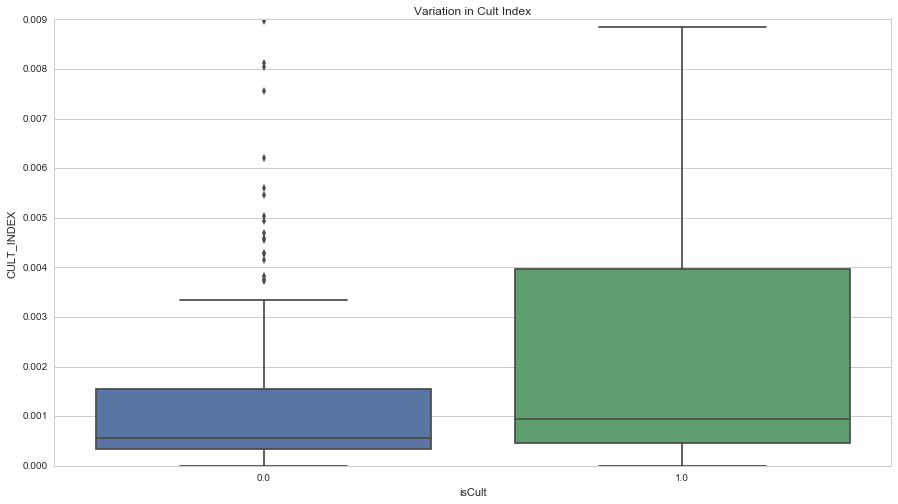

In [223]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

#sns.boxplot(x='genre',y='CULT_INDEX',data=mov.loc[~mov.genre.isin(['Foreign','Drama']),:])
sns.boxplot(x='isCult',y='CULT_INDEX',data=movsample)
plt.ylim(0,0.009)
plt.title('Variation in Cult Index')

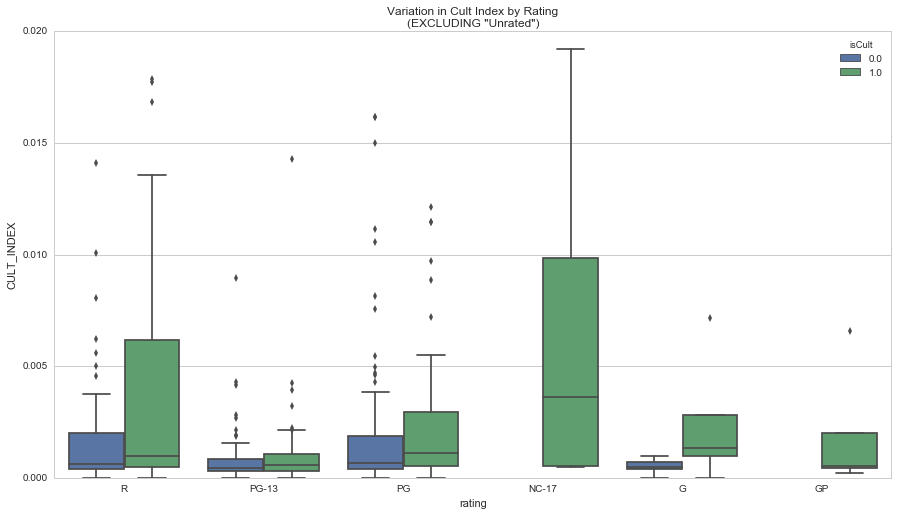

In [231]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

#sns.boxplot(x='genre',y='CULT_INDEX',data=mov.loc[~mov.genre.isin(['Foreign','Drama']),:])
sns.boxplot(x='rating',y='CULT_INDEX',data=movsample.loc[~movsample.rating.isin(['Unrated']),:], hue='isCult')
plt.ylim(0,0.02)
plt.title('Variation in Cult Index by Rating\n(EXCLUDING "Unrated")')

In [232]:
movsample.columns

Index([                u'director',              u'distributor',
                   u'genre_bomojo',                   u'rating',
                          u'title',              u'releaseDate',
                         u'isCult',               u'canontitle',
                   u'num_theaters',                u'leadActor',
                   u'runtime_mins',              u'releaseYear',
                u'rev_opening_ADJ',       u'rev_totalGross_ADJ',
                u'prod_budget_ADJ',               u'CULT_INDEX',
       u'is_missing_prodbudgetADJ',                    u'genre',
                u'lifetimeRevenue'],
      dtype='object')

In [234]:
#SWITCHING TO CHECK OUT THE NUMERIC FEATURES
mov.to_csv('./movie_df_apr28.csv',header=True,encoding='utf-8')
pickle.dump(mov, open('movie_DF_0428.p', 'wb'))

In [235]:


#BACK TO CATEGORICALS
with open(r"movie_DF_0427.p", "rb") as input_file:
    mov = pickle.load(input_file)


In [237]:
mov=mov[mov.runtime_mins.notnull()]

In [239]:
mov.head()

,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre
1,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,1,Geraldine Page,108,1985,20560.131429,4.502261e+07,5650869.561865,1.558343,1,Drama
3,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,1,Dennis Christopher,100,1979,60753.264000,1.934629e+08,24281886.199245,1.541993,1,Comedy
13,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,1,Albert Brooks,93,1981,57915.000000,2.891783e+07,3629530.152339,1.479403,1,Romantic
26,Martin Scorsese,Warner Bros.,Unknown,R,After Hours,1985-09-13,1,afterhours,1,Griffin Dunne,96,1985,111380.657143,6.375674e+07,61933085.501859,1.471978,1,Unknown
23,Will Carroll,Miramax,Romance,R,Playing by Heart,1999-01-01,0,playingbyheart,1,Angelina Jolie,121,1999,45764.004000,1.169051e+07,28571428.571429,1.461017,0,Romance


In [243]:
len(mov.director.unique())

2150

In [387]:
#get representative sample from noncult labels to compare
cult = mov[mov.isCult==1]
nocultSample = mov[mov.isCult==0].sample(432)

movsample = pd.concat([cult, nocultSample])
#cult.isCult.sum()
movsample.shape

(870, 18)

In [388]:
len(cult.director.unique())

332

In [389]:
cult.director.value_counts()

David Lynch                           5
David Cronenberg                      4
Walter Hill                           4
Joel Coen                             4
Martin Scorsese                       3
Jim Jarmusch                          3
Michael Lehmann                       3
Trey Parker                           3
Stanley Kubrick                       3
Kathryn Bigelow                       3
John Waters                           3
Ridley Scott                          3
Mel Brooks                            3
Darren Aronofsky                      3
John Hughes                           3
Jonathan Demme                        3
Brian De Palma                        3
Wes Anderson                          3
Paul Verhoeven                        3
Steven Soderbergh                     3
Quentin Tarantino                     3
Abel Ferrara                          3
Wes Craven                            3
Tony Scott                            3
John Carpenter                        3


In [250]:
mov.to_csv('./movie_df_apr28.csv',header=True,encoding='utf-8')

In [406]:
mov = pd.read_csv('./movie_df_apr28.csv',header=0,encoding='utf-8')

In [407]:
mov.head()

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre
0,1,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,1,Geraldine Page,108,1985,20560.131429,4.502261e+07,5650869.56187,1.558343,1,Drama
1,3,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,1,Dennis Christopher,100,1979,60753.264000,1.934629e+08,24281886.19920,1.541993,1,Comedy
2,13,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,1,Albert Brooks,93,1981,57915.000000,2.891783e+07,3629530.15234,1.479403,1,Romantic
3,26,Martin Scorsese,Warner Bros.,Unknown,R,After Hours,1985-09-13,1,afterhours,1,Griffin Dunne,96,1985,111380.657143,6.375674e+07,61933085.50190,1.471978,1,Unknown
4,23,Will Carroll,Miramax,Romance,R,Playing by Heart,1999-01-01,0,playingbyheart,1,Angelina Jolie,121,1999,45764.004000,1.169051e+07,28571428.57140,1.461017,0,Romance


In [408]:
mov.drop(['Unnamed: 0'],axis=1,inplace=True)

In [386]:
pickle.dump(mov, open('movie_DF_0428.p', 'wb'))

In [279]:
cult_dirs=cult.groupby(['director','distributor'], sort=True).size().reset_index()


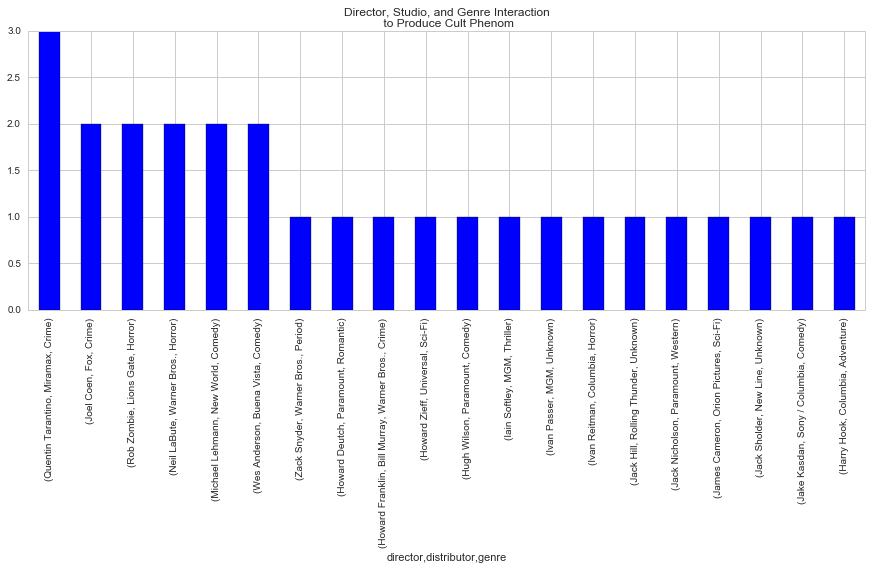

In [390]:
cult.groupby(['director','distributor','genre']).size().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,5), title='Director, Studio, and Genre Interaction\n to Produce Cult Phenom')

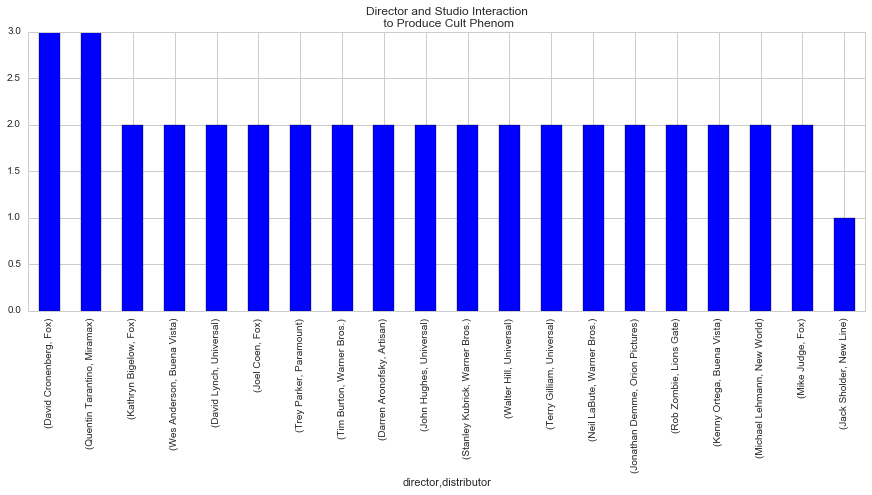

In [304]:
cult.groupby(['director','distributor']).size().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,5), title='Director and Studio Interaction\n to Produce Cult Phenom')

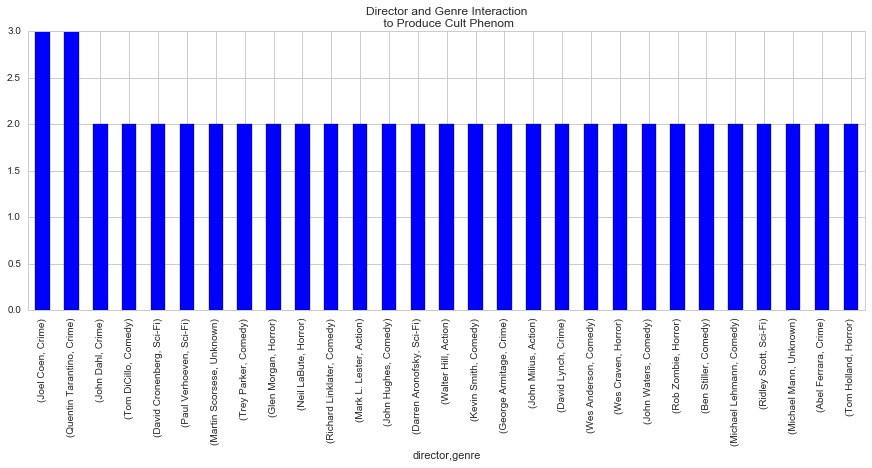

In [340]:
cult.groupby(['director','genre']).size().sort_values(ascending=False).head(29).plot(kind='bar', figsize=(15,5), title='Director and Genre Interaction\n to Produce Cult Phenom')

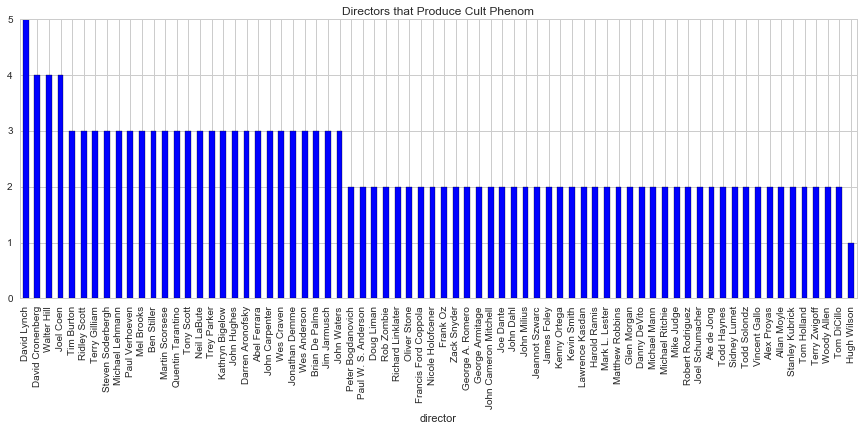

In [345]:
cult.groupby(['director']).size().sort_values(ascending=False).head(72).plot(kind='bar', figsize=(15,5),title='Directors that Produce Cult Phenom')

In [344]:
list(cult.groupby(['director']).size().sort_values(ascending=False).reset_index().iloc[4:71,0])

[u'Tim Burton',
 u'Ridley Scott',
 u'Terry Gilliam',
 u'Steven Soderbergh',
 u'Michael Lehmann',
 u'Paul Verhoeven',
 u'Mel Brooks',
 u'Ben Stiller',
 u'Martin Scorsese',
 u'Quentin Tarantino',
 u'Tony Scott',
 u'Neil LaBute',
 u'Trey Parker',
 u'Kathryn Bigelow',
 u'John Hughes',
 u'Darren Aronofsky',
 u'Abel Ferrara',
 u'John Carpenter',
 u'Wes Craven',
 u'Jonathan Demme',
 u'Wes Anderson',
 u'Brian De Palma',
 u'Jim Jarmusch',
 u'John Waters',
 u'Peter Bogdanovich',
 u'Paul W. S. Anderson',
 u'Doug Liman',
 u'Rob Zombie',
 u'Richard Linklater',
 u'Oliver Stone',
 u'Francis Ford Coppola',
 u'Nicole Holofcener',
 u'Frank Oz',
 u'Zack Snyder',
 u'George A. Romero',
 u'George Armitage',
 u'John Cameron Mitchell',
 u'Joe Dante',
 u'John Dahl',
 u'John Milius',
 u'Jeannot Szwarc',
 u'James Foley',
 u'Kenny Ortega',
 u'Kevin Smith',
 u'Lawrence Kasdan',
 u'Harold Ramis',
 u'Mark L. Lester',
 u'Matthew Robbins',
 u'Glen Morgan',
 u'Danny DeVito',
 u'Michael Mann',
 u'Michael Ritchie',
 u'Mi

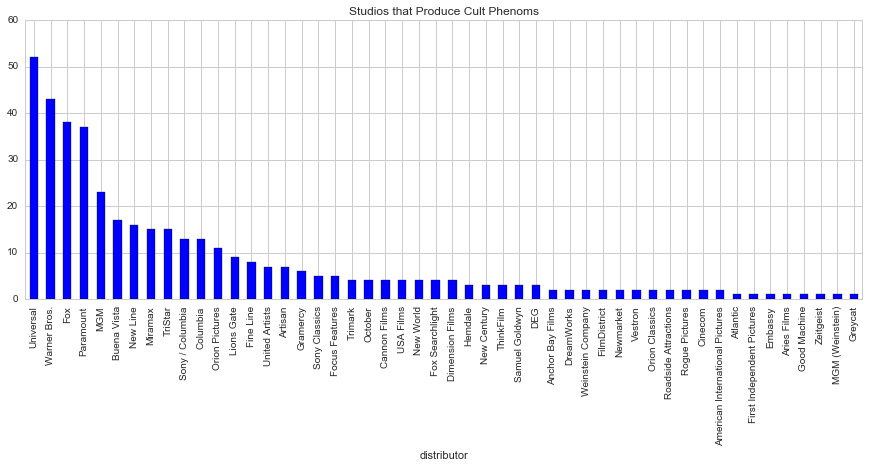

In [308]:
cult.groupby(['distributor']).size().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5),title='Studios that Produce Cult Phenoms')

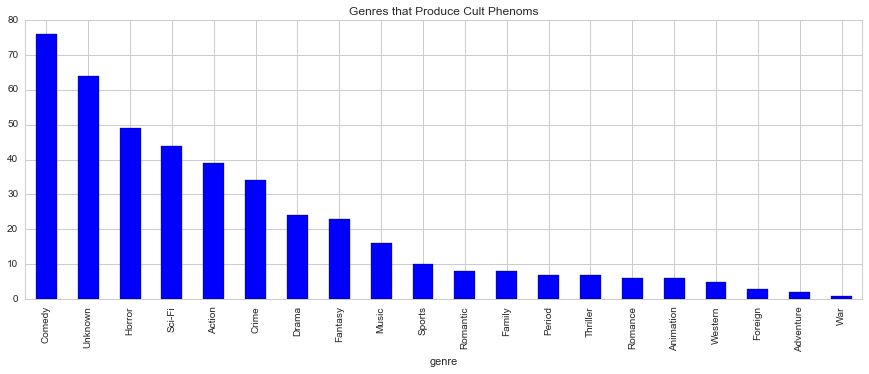

In [309]:
cult.groupby(['genre']).size().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5),title='Genres that Produce Cult Phenoms')

In [293]:
cult[cult.distributor=='Universal']

,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre
896,David Lynch,Universal,Drama / Thriller,R,Mulholland Drive,2001-10-08,1,mulhollanddrive,66.000000,Naomi Watts,147,2001,900273.353571,1.694924e+07,2.127329e+06,1.009102,1,Drama
1173,Robert Greenwald,Universal,Musical,PG,Xanadu,1980-08-08,1,xanadu,249.000000,Olivia Newton-John,96,1980,4856263.500000,2.478844e+08,3.111241e+07,1.002514,1,Music
1317,Steven Spielberg,Universal,Period Comedy,PG,1941,1979-12-14,1,1941,325.000000,John Belushi,118,1979,9272913.936000,3.740389e+08,1.147383e+08,1.001889,0,Period
1285,Jeannot Szwarc,Universal,Romance,PG,Somewhere in Time,1980-10-03,1,somewhereintime,369.000000,Christopher Reeve,103,1980,3969936.300000,1.057375e+08,1.327130e+07,1.001645,1,Romance
1548,John Landis,Universal,Comedy,R,The Blues Brothers,1980-06-20,1,bluesbrothers,594.000000,Dan Aykroyd,150,1980,16031901.600000,6.232335e+08,7.822314e+07,1.001026,1,Comedy
5230,Sidney Lumet,Universal,Musical,G,The Wiz,1978-10-01,1,wiz,640.000000,Diana Ross,134,1978,6138591.642857,2.929216e+08,3.676512e+07,1.000973,1,Music
1704,David Cronenberg,Universal,Sci-Fi Horror,R,Videodrome,1983-02-04,1,videodrome,600.000000,James Woods,89,1983,3305168.225806,1.624340e+07,2.038732e+06,1.000921,1,Sci-Fi
1711,John Carpenter,Universal,Sci-Fi Horror,R,The Thing,1982-06-25,1,thing,840.000000,Kurt Russell,109,1982,9195088.365517,1.718279e+08,2.156641e+07,1.000703,1,Sci-Fi
1712,"Matthijs van Heijningen, Jr.",Universal,Sci-Fi Horror,R,The Thing,1982-06-25,1,thing,840.000000,Mary Elizabeth Winstead,109,1982,9195088.365517,1.718279e+08,2.156641e+07,1.000703,1,Sci-Fi
2257,David Lynch,Universal,Sci-Fi Fantasy,PG-13,Dune,1984-12-14,1,dune,915.000000,Kyle MacLachlan,137,1984,15665236.600000,2.090577e+08,9.162656e+07,1.000631,0,Sci-Fi


In [410]:
#SUGGESTED GROUPING BUCKETS ARE 
#Director: SEASONED (>3), INTERMEDIATES>1, NOVICES==1, OTHER
#Genre: as is
#Distributor: SEASONED(>30), INTERMEDIATES>5, NOVICES>1, OTHER

#Group DIrectors
mov['directorTier']=mov['director']
mov.directorTier.replace(list(cult.groupby(['director']).size().sort_values(ascending=False).head(4).reset_index().iloc[:,0]), 'SEASONED', inplace=True)
mov.directorTier.replace(list(cult.groupby(['director']).size().sort_values(ascending=False).reset_index().iloc[4:71,0]), 'INTERMEDIATE', inplace=True)
mov.directorTier.replace(list(cult.groupby(['director']).size().sort_values(ascending=False).reset_index().iloc[72:cult.shape[0],0]), 'NOVICE', inplace=True)


In [420]:
mov['directorTier']=mov.directorTier.str.replace(r'.*[^SEASONED|INTERMEDIATE|NOVICE].*','OTHER')

In [421]:
mov.directorTier.value_counts()

OTHER           3603
NOVICE           863
INTERMEDIATE     542
SEASONED          35
Name: directorTier, dtype: int64

In [403]:
#mov=mov[mov.directorTier.isin(['OTHER','SEASONED','NOVICE','INTERMEDIATE'])]

In [422]:
pickle.dump(mov, open('movie_DF_0428_1.p', 'wb'))

In [423]:
#WHEW, do teh same thing for STUDIOS (DISTRIBUTORS)

OTHER           3603
NOVICE           863
INTERMEDIATE     542
SEASONED          35
Name: directorTier, dtype: int64

In [424]:
mov['studioTier']=mov['distributor']
mov.studioTier.replace(list(cult.groupby(['distributor']).size().sort_values(ascending=False).head(4).reset_index().iloc[:,0]), 'SEASONED', inplace=True)
mov.studioTier.replace(list(cult.groupby(['distributor']).size().sort_values(ascending=False).reset_index().iloc[4:26,0]), 'INTERMEDIATE', inplace=True)
mov.studioTier.replace(list(cult.groupby(['distributor']).size().sort_values(ascending=False).reset_index().iloc[27:cult.shape[0],0]), 'NOVICE', inplace=True)


In [426]:
mov['studioTier']=mov.studioTier.str.replace(r'.*[^SEASONED|INTERMEDIATE|NOVICE].*','OTHER')

In [427]:
mov.studioTier.value_counts()

INTERMEDIATE    2239
SEASONED        1881
NOVICE           539
OTHER            411
Name: studioTier, dtype: int64

In [428]:
mov.head()

,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre,directorTier,studioTier
0,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,1,Geraldine Page,108,1985,20560.131429,4.502261e+07,5650869.56187,1.558343,1,Drama,OTHER,NOVICE
1,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,1,Dennis Christopher,100,1979,60753.264000,1.934629e+08,24281886.19920,1.541993,1,Comedy,OTHER,SEASONED
2,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,1,Albert Brooks,93,1981,57915.000000,2.891783e+07,3629530.15234,1.479403,1,Romantic,OTHER,INTERMEDIATE
3,Martin Scorsese,Warner Bros.,Unknown,R,After Hours,1985-09-13,1,afterhours,1,Griffin Dunne,96,1985,111380.657143,6.375674e+07,61933085.50190,1.471978,1,Unknown,INTERMEDIATE,SEASONED
4,Will Carroll,Miramax,Romance,R,Playing by Heart,1999-01-01,0,playingbyheart,1,Angelina Jolie,121,1999,45764.004000,1.169051e+07,28571428.57140,1.461017,0,Romance,OTHER,INTERMEDIATE


In [429]:
pickle.dump(mov, open('movie_DF_0428.p', 'wb'))